# Laboratorio Integrador #1

En el siguiente laboratorio los estudiantes deben trabajar con un dataset de **alta numerosidad-baja dimensionalidad** y aplicar las técnicas de reducción de dimensionalidad estudiadas en clases, así como la integración de las mismas dentro de un sistema de detección de anomalías. Además, se recomienda que los estudiantes validen los espacios reducidos en un flujo de clasifación supervisada para contrastar resultados.

Objetivo:
*   Implementar un sistema de detección de anomalías sobre el espacio original de los datos, un espacio reducido con técnicas no lineales (Isomap) y no geométricas (ICA).
*   Analizar los resultados de clasificación obtenidos en distintos ecenarios usando algoritmos clásicos (Isolation Forest, Local Outlier Factor, one-class SVM) para la detección de anomalías.

Actividad Evaluativa:
1.   Es un trabajo individual.
2.   Implementar las dos técnicas de reducción de dimensionalidad (Isomap e ICA) al dataset de trabajo y obtener dos espacios reducidos. Sugerentemente variar los parámetros de los modelos de reducción de dimensionalidad para alcanzar el mejor desempeño (ej: n_components = 7,17,27,30; neighbors=5,10). Mostrar los gráficos de los espacios reducidos para cada combinación de parámetros (Un subplot tipo grid)
3.   Aplicar en el espacio original y los reducidos, al menos uno de los algoritmos de detección de anomalías proporcionados y medir el desempeño de clasificación usando dos métricas supervisadas (Precision, Recall). Construir el plot PR (precission-recall) para cada resultado de clasficación del algoritmo seleccionado.
4.   Presentar un análisis de resultados de acuerdo a las métricas calculadas y el plot PR (precision-recall) donde se evidencie la comparativa y la selección del esquema ganador (modelo de reducción + clasificador) durante el entrenamiento.
5.   Aplicar el esquema seleccionado como ganador (del punto 4) al conjunto test externo y calcular las métricas precision y recall para constatar el poder de generalización.
6.   Subir el cuaderno desarrollado a la carpeta de trabajo en el D2L.

**Nota:** El conjunto test no puede tener más del 90% de las instancias.  

Valor:
*   25 puntos

Penalizaciones:
*   Cualquier error de implementación o concepto, se penalizará con -1 punto (acumulativo).
*   La no realización del punto 2 de la actividad se penalizará con el 50% (10 puntos).
*   La no realización del punto 3 de la actividad se penalizará con el 20% (4 puntos).
*   La no realización del punto 4 de la actividad se penalizará con el 20% (4 puntos).
*   La no realización del punto 5 de la actividad se penalizará con el 10% (2 puntos).
*   La no realización del punto 6 de la actividad se penalizará con el 100% (25 puntos).



# *Setup*
Overall libraries for data handling, visualization, preparation, and evaluation

In [4]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import io
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load and Explore data

In [5]:
# Load datasets
file_path = 'credit_card.csv'
data = pd.read_csv(file_path)
# Preview data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Describe data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Count total fraud
print("Number of fraudulent transactions:", data['Class'].sum())

Number of fraudulent transactions: 492


In [ ]:
# Split to train and test and scale features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Class', axis=1), 
    data['Class'], 
    test_size=0.3, 
    random_state=42, 
    stratify=data['Class']
)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)





RangeIndex(start=0, stop=199364, step=1)


In [46]:
# View scatterplot
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.iloc[:,0:2], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

# MLC



In [10]:
from sklearn.ensemble import IsolationForest

# Parámetros del Isolation Forest
n_estimators = 100
contamination = 0.2  # Ajusta esto según la proporción de anomalías esperadas
random_state = 42

# Inicializar Isolation Forest
iso_forest = IsolationForest(n_estimators=n_estimators, 
                             contamination=contamination, 
                             random_state=random_state)

# Ajustar el modelo a los datos de entrenamiento
iso_forest.fit(data)

# Predecir anomalías (1 para normal, -1 para outliers)
y_pred_train = iso_forest.predict(data)


In [11]:
from sklearn.neighbors import LocalOutlierFactor

# Parámetros del Local Outlier Factor
n_neighbors = 20  # Número de vecinos a considerar, ajusta según sea necesario
contamination = 0.2  # Proporción esperada de anomalías

# Inicializar y predecir con Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
y_pred_train = lof.fit_predict(data)


In [12]:
from sklearn.svm import OneClassSVM

# Parámetros del One-Class SVM
nu = 0.02  # Proporción de anomalías esperadas (similar a `contamination`)
kernel = 'rbf'  # Tipo de kernel, 'rbf' es común para detectar outliers
gamma = 'scale'  # Ajuste automático del parámetro gamma

# Inicializar One-Class SVM
oc_svm = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)

# Ajustar el modelo a los datos de entrenamiento y predecir anomalías
oc_svm.fit(data)
y_pred_train = oc_svm.predict(data)



# Punto 2




## Isomap

In [36]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=3, n_neighbors=5, n_jobs=-1)
X_iso = isomap.fit_transform(X_train_std)

c:\Users\ASUS\Documents\Maestria\Semana_1_ANS\ven\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 34 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\ASUS\Documents\Maestria\Semana_1_ANS\ven\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\ASUS\Documents\Maestria\Semana_1_ANS\ven\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\ASUS\Documents\Maestria\Semana_1_ANS\ven\Lib\site-packages\scipy\sparse\_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expe

MemoryError: Unable to allocate 296. GiB for an array with shape (199364, 199364) and data type float64

In [ ]:
scatterPlot(X_iso, y_train, "StandardScaler")

## ICA

In [47]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=3, random_state=42, max_iter=1000)
X_ica = ica.fit_transform(X_train_std)
X_ica=pd.DataFrame(X_ica, columns=['IC1', 'IC2', 'IC3'])

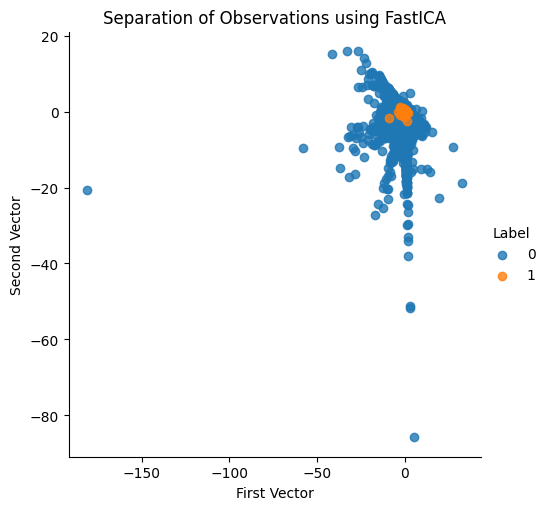

In [49]:
scatterPlot(X_ica, y_train, "FastICA")

# Punto 3



# Punto 4


# Punto 5